## **Исследование факторов, определяющих успешность компьютерной игры**


## Оглавление

<a href='#1'>1. Знакомство с данными</a>
* <a href='#1.1'>1.1 Изучим общую информацию по таблице </a>
* <a href='#1.2'>1.2 Предобработка данных - тип данных, пропуски, дубликаты </a>
* <a href='#1.3'>1.3 Суммарные продажи во всех регионах </a>

<a href='#2'>2. Исследовательский анализ данных</a>
* <a href='#2.1'>2.1 Количество выпускаемы игр по годам </a>
* <a href='#2.2'>2.2 Изменение в продажах по платформам </a>
* <a href='#2.3'>2.3 Актуальный период, срез по годам </a>
* <a href='#2.4'>2.4 «Ящик с усами» по глобальным продажам игр в разбивке по платформам </a>
* <a href='#2.5'>2.5 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков </a>
* <a href='#2.6'>2.6 Сравнение с играми на других платформах </a>   
* <a href='#2.7'>2.7 Общее распределение игр по жанрам </a>   

<a href='#3'>3. Портрет пользователя каждого региона (NA, EU, JP) </a>
* <a href='#3.1'>3.1 Самые популярные платформы (топ-5) для пользователя каждого региона. Описание различия в долях продаж. </a>
* <a href='#3.2'>3.2 Самые популярные жанры (топ-5) </a>
* <a href='#3.3'>3.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе? </a>

<a href='#4'>4. Проверка гипотез </a>
* <a href='#4.1'>4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые </a>
* <a href='#4.2'>4.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. </a>

<a href='#5'>5. Общий вывод</a>

<a id='1'></a>
# Шаг 1. Знакомство с данными

<a id='1.1'></a>
### 1.1 Изучим общую информацию по таблице

In [1]:
#Импорт библиотек

import pandas as pd #для описания и анализа данных
import matplotlib.pyplot as plt # для работы с графиками
#магия, чтобы график был сразу после выполнения кода
%matplotlib inline 
import numpy as np # для эффективной работы с вычислениями и большими массивами

In [2]:
#Открываем наши данные

df = pd.read_csv('games.csv')

***Выведем информация на экран***

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14250,Magna Carta Portable,PSP,2006.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
3297,Small Soldiers,PS,1998.0,Platform,0.34,0.23,0.00,0.04,NaN,NaN,NaN
8412,Disney Sing It: Family Hits,PS3,2010.0,Misc,0.11,0.03,0.00,0.02,72.0,tbd,E
14404,Prison Architect,PS4,2016.0,Action,0.01,0.01,0.00,0.01,80.0,8,M
16580,Dengeki Gakuen RPG: Cross of Venus Special,DS,2011.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11189,Chou Jigen Game Neptune Mk-II,PS3,2011.0,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,NaN
15293,Ballblazer Champions,PS,1997.0,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
13125,Top Spin 2,DS,2006.0,Sports,0.05,0.00,0.00,0.00,51.0,tbd,E
4741,Disney's Tarzan Untamed,PS2,2001.0,Platform,0.20,0.16,0.00,0.05,59.0,7.1,E


***Описание данных***

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

***Изучим общую информацию по таблице***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


***Приведем названия столбцов к нижнему регистру***

In [5]:
df.columns = df.columns.str.lower()

* В данных присутствуют пропущенные значения;
* Нужно изменить тип данных столбца 'User_Score' на float64 для дальнейшего анализа;

<a id='1.2'></a>
### 1.2 Предобработка данных - тип данных, пропуски, дубликаты

### **Обработка пропусков**

***Проверим, какой объем данных для нас неизвестен.***

In [6]:
df.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В части столбцов есть пропущенные значения, это данные по:
* названию игры - 0.01% пропусков - совсем мало, но заменим пропущенные значения на 'no_info'
* году выпуска - 1.61% пропусков - пропусков немного, но средним или медианным значением их не получится заполнить, заполним значением маркер 99
* жанру - 0.01% пропусков - совсем мало, но заменим пропущенные значения на 'no_info'
* рейтинг по возрастной категории от организации ESRB - 40.48% пропусков - важная информация для нас, но, к сожалению, заполнить ее не получится автоматически. Возможно, ещё не действовали возрастные ограничения для игр на момент их выпуска, поэтому и стоят пропуски. Данные терять не будем, заполним 'no_info'
* оценке пользователей - 40.09% пропусков - важная характеристика, медиана или средняя тоже не подойдут, каждая игра оценивается пользователями индивидуально,поэтому заполним значением маркером -1.
* оценке критиков - 51.32% пропусков - та же история, что и с оценками пользователей, заполним маркером -1.

Ценые данные отсутствуют по оценкам критиков и пользователей почти у половину игр, в идеале бы уточнить у разработчиков причину их отсутствия, а пока предположим, что у пользователей и критиков не было возможности проставить оценку, потому что не было такого сервиса на момент выхода игры.

***Заменим пропуски в названии и жанре, рейтинге ESRB на 'no_info'***

In [7]:
df['name'] = df['name'].fillna('no_info')
df['genre'] = df['genre'].fillna('no_info')
df['rating'] = df['rating'].fillna('no_info')

***Заменим пропуски в оценках пользователей и критиков на значения маркер -1, а год выпуска на маркер 9999***

In [8]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['year_of_release'] = df['year_of_release'].fillna(99)

#Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


### **Замена типа данных**

***Проверим значения по оценкам пользователей***

Очень странно, что тип текстовый, может быть кто-то что-то написал вместо того, чтобы поставить числоую оценку?

In [9]:
df['user_score'].value_counts()

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1         2
0.3       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Вместо оценки присутствует странное значение **'tbd'**. Погуглив немного, разобралась , что это значит. В системе пользовательских оценок для игр Metacritic аббревиатура 'tbd' означает, что игра имеет недостаточное количество отзывов, считается, что меньше 4. Очевидно, такое количество непоказательно и оценку не выставляют. По сути, это те же неизвестные для нас данные, поэтому заменим их на NaN.

***Изменим тип данных столбца 'User_Score' на float64***

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int')

### **Проверка на дубли**

In [11]:
df.duplicated().sum()

0

Дублей не обнаружено, это хорошо.

<a id='1.3'></a>
### 1.3 Суммарные продажи во всех регионах

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3236,LEGO Pirates of the Caribbean: The Video Game,3DS,2011,Action,0.29,0.27,0.00,0.06,71.0,7.3,E10+,0.62
836,Donkey Kong Country,GBA,2003,Platform,1.20,0.48,0.29,0.07,78.0,8.9,E,2.04
13893,Game of Thrones (Telltale),PS3,2015,Adventure,0.02,0.02,0.00,0.01,-1.0,-1.0,no_info,0.05


<a id='2'></a>
# Шаг 2. Исследовательский анализ данных

<a id='2.1'></a>
### 2.1 Количество выпускаемых игр по годам

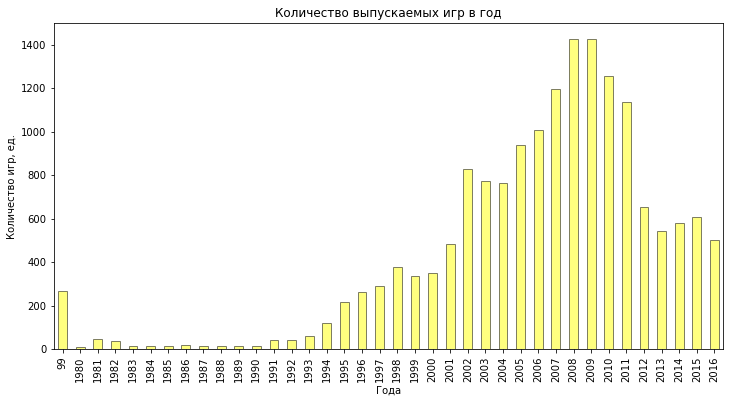

In [14]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(12,6), ec='black', 
                                                   color='yellow', alpha=0.5, title = 'Количество выпускаемых игр в год')
plt.xlabel('Года')
plt.ylabel('Количество игр, ед.')
plt.show()


До 1994 года игры практически не выпукались, после потихоньку интерес пользователей и разработчиков шел вверх, появлились технологические и технические возможности для реализации крутых идей. Максимум по выпущенным играм приходится на 2008-2009 год, дальше снова идет спад. Возможно, это связано с тем, что как раз в это время увеличился интерес к соц.сетям, начали набирать популярность онлайн-игры, то  есть появилось больше интересных альтернатив. И плюс трудоемкость выпуска игр увеличилась, разработчики могут работать над 1 игрой не 1-2 года, а 4-7 лет.

<a id='2.2'></a>
### 2.2 Изменение в продажах по платформам

*Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

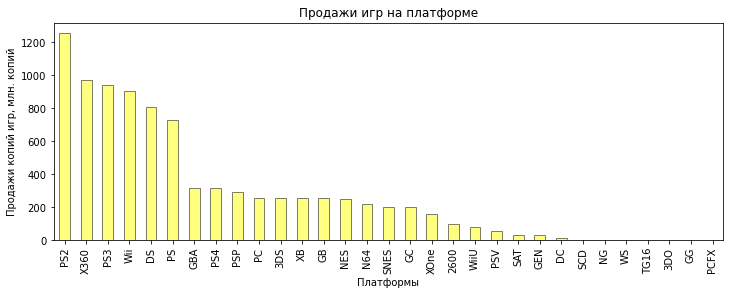

In [15]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,4), ec='black', 
                                                   color='yellow', alpha=0.5, title = 'Продажи игр на платформе')
plt.xlabel('Платформы')
plt.ylabel('Продажи копий игр, млн. копий')
plt.show()

Самые популярные платформы для игр - это PS2, X360, PS3, Wii, DS, PS

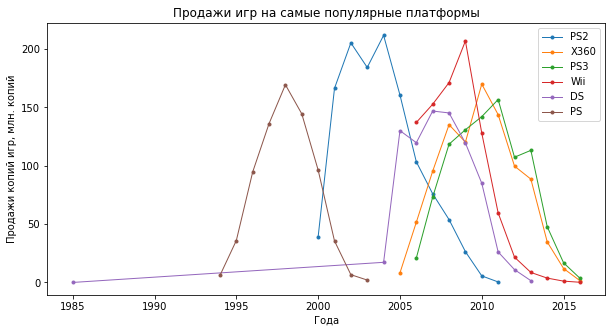

In [16]:
df = df[df['year_of_release'] != 99]
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform in platforms:
    df_top_platforms = df.query('platform == @platform')
    lines = df_top_platforms.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', fontsize=10,
                                                                    linewidth=1, label=platform, figsize=(10,5), 
                                                                    title = 'Продажи игр на самые популярные платформы')
plt.xlabel('Года')
plt.ylabel('Продажи копий игр, млн. копий')
plt.legend()
plt.show()

Посмотрим, в какой период времени шли продажи игр на самые популярные платформы:
* PS2 - с 2000-2011 (11 лут)
* X360 - 2005-2016 (11 лет)
* PS3 - 2006-2016 (10 лет)
* Wii - 2005-2016 (11 лет)
* DS - 1985-2013 (по 2004 год нет данных, будем считать 9 лет)
* PS- 1994-2003 (9 лет)

Думаю, можно считать, что в среднем 10 лет - это срок, за который появляются новые и исчезают старые платформы.

<a id='2.3'></a>
### 2.3 Актуальный период, срез по годам

Из графика выше мы видим, что игры на платформы, которые были выпущены до 2005 года мало кто уже покупает. Да и самые популярные платформы X360, Wii и PS3 были выпущены после 2005. Значит, актуальный для нас период - 2005-2016.

In [17]:
df_act=df[df['year_of_release'] >= 2005]

<a id='2.4'></a>
### 2.4 «Ящик с усами» по глобальным продажам игр в разбивке по платформам

***Рассмотрим продажи по топовым платформам***

In [18]:
df_top = df_act[df_act['platform'].isin(('PS2', 'X360', 'PS3', 'Wii', 'DS'))]

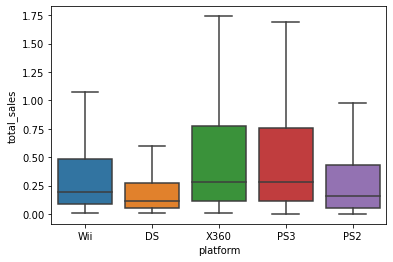

In [19]:
import seaborn as sns
sns.boxplot(x = "platform", y = "total_sales", data = df_top, showfliers=False)
plt.show()

В среднем медиана по топопвым платформам для игр варьируется примерно от 0,2-0,25 млн.проданных копий игр. 
Самая высокая верхняя граница у 'X360' - 1,75 млн. копий игр, на втором месте 'PS3'.
Отдельно хочется отметить 'DS', несмотря на то, что спустя время, она ещё держится на рынке, продажи по ней на порядок ниже остальных.

<a id='2.5'></a>
### 2.5 Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Для нашего исследования возьмем одну из самых популярных платформ у 'X360' 

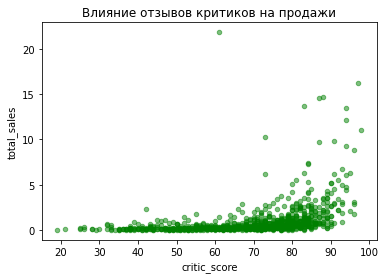

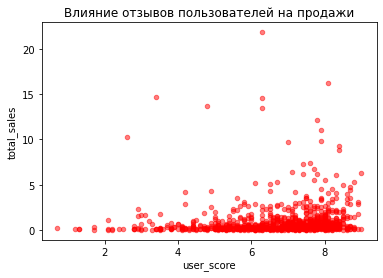

In [20]:
df_X360_1 = df_act[(df_act['platform'] == 'X360') & (df_act['critic_score'] > 0)]
df_X360_2 = df_act[(df_act['platform'] == 'X360') & (df_act['user_score'] > 0)]

df_X360_1.plot(x = 'critic_score',y = 'total_sales', kind='scatter', color='green',alpha=0.5, 
             title='Влияние отзывов критиков на продажи')
df_X360_2.plot(x = 'user_score',y = 'total_sales', kind='scatter', color='red',alpha=0.5, 
             title='Влияние отзывов пользователей на продажи')
plt.show()

Рассчитаем коэффициент Пирсона для более точной оценки зависимости.

In [21]:
print(df_X360_1['critic_score'].corr(df['total_sales'])) 
print(df_X360_2['user_score'].corr(df['total_sales']))

0.39286589254007026
0.11418661214018036


Исходя из графиков, в оценке зависимости продаж от оценок критиков видна прямая связь, что логично, так как эта оценка включает в себя объективно все плюсы и минусы от игры. А вот оценка пользователя более субъективна, и по графику видно, что выбросов стало больше, хоть и сохраняется общая тенденция чем выше оценка - тем выше продажи игр. Коэффициент Пирсона подтверждает наши графики, ну и стоит сказать, что хоть зависимость в обоих случая видна, но она незначительна.

<a id='2.6'></a>
### 2.6 Сравнение с играми на других платформах

Рассмотрим также зависимость продаж от оценок критиков и пользователей для платформ 'PS2', 'PS3', 'Wii' и 'DS'

**'PS2'**

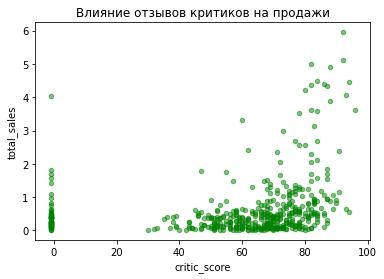

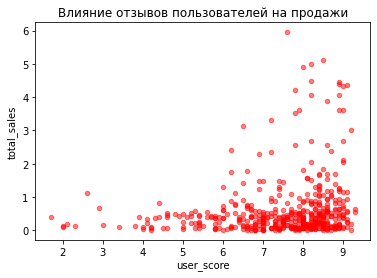

In [22]:
df_PS2 = df_act[(df_act['platform'] == 'PS2') & (df_act['critic_score'] > 0)]
df_PS2 = df_act[(df_act['platform'] == 'PS2') & (df_act['user_score'] > 0)]

df_PS2.plot(x = 'critic_score',y = 'total_sales', kind='scatter', color='green',alpha=0.5, 
             title='Влияние отзывов критиков на продажи')
df_PS2.plot(x = 'user_score',y = 'total_sales', kind='scatter', color='red',alpha=0.5, 
             title='Влияние отзывов пользователей на продажи')
plt.show()

In [23]:
corr = df_PS2.corr()
corr.style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092208,-0.129309,-0.083704,0.166926,-0.486139,-0.258470,-0.054190
na_sales,-0.092208,1.000000,0.332048,0.134829,0.401204,0.290482,0.182993,0.841496
eu_sales,-0.129309,0.332048,1.000000,0.229935,0.220183,0.102262,0.112525,0.622397
jp_sales,-0.083704,0.134829,0.229935,1.000000,0.274913,0.143674,0.153973,0.443570
other_sales,0.166926,0.401204,0.220183,0.274913,1.000000,0.085728,0.056122,0.690949
critic_score,-0.486139,0.290482,0.102262,0.143674,0.085728,1.000000,0.333196,0.257023
user_score,-0.258470,0.182993,0.112525,0.153973,0.056122,0.333196,1.000000,0.190395
total_sales,-0.054190,0.841496,0.622397,0.443570,0.690949,0.257023,0.190395,1.000000


**'PS3'**

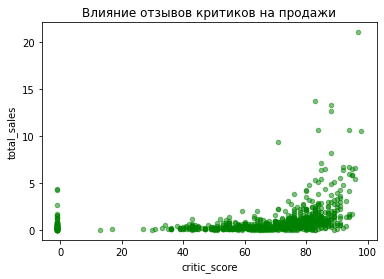

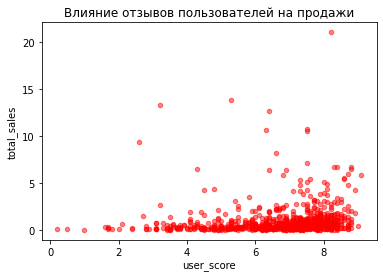

In [24]:
df_PS3 = df_act[(df_act['platform'] == 'PS3') & (df_act['critic_score'] > 0)]
df_PS3 = df_act[(df_act['platform'] == 'PS3') & (df_act['user_score'] > 0)]

df_PS3.plot(x = 'critic_score',y = 'total_sales', kind='scatter', color='green',alpha=0.5, 
             title='Влияние отзывов критиков на продажи')
df_PS3.plot(x = 'user_score',y = 'total_sales', kind='scatter', color='red',alpha=0.5, 
             title='Влияние отзывов пользователей на продажи')
plt.show()

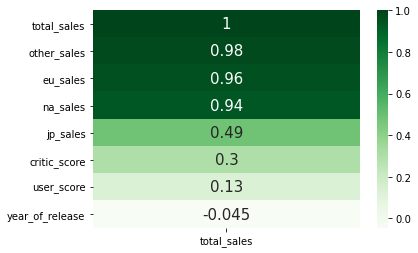

In [25]:
sns.heatmap(df_PS3.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15})

**'Wii'**

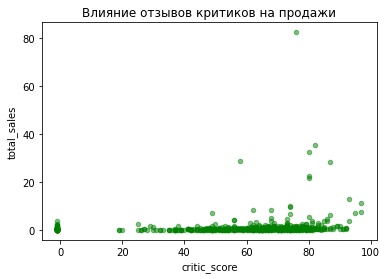

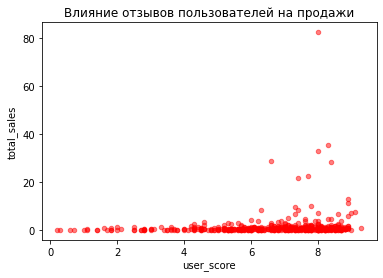

In [26]:
df_Wii = df_act[(df_act['platform'] == 'Wii') & (df_act['critic_score'] > 0)]
df_Wii = df_act[(df_act['platform'] == 'Wii') & (df_act['user_score'] > 0)]

df_Wii.plot(x = 'critic_score',y = 'total_sales', kind='scatter', color='green',alpha=0.5, 
             title='Влияние отзывов критиков на продажи')
df_Wii.plot(x = 'user_score',y = 'total_sales', kind='scatter', color='red',alpha=0.5, 
             title='Влияние отзывов пользователей на продажи')
plt.show()

In [27]:
corr = df_Wii.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.00,-0.06,-0.04,-0.04,-0.06,-0.07,0.05,-0.05
na_sales,-0.06,1.00,0.98,0.79,0.99,0.13,0.11,0.99
eu_sales,-0.04,0.98,1.00,0.79,0.99,0.14,0.10,0.99
jp_sales,-0.04,0.79,0.79,1.00,0.79,0.17,0.13,0.83
other_sales,-0.06,0.99,0.99,0.79,1.00,0.13,0.10,1.00
critic_score,-0.07,0.13,0.14,0.17,0.13,1.00,0.53,0.14
user_score,0.05,0.11,0.10,0.13,0.10,0.53,1.00,0.11
total_sales,-0.05,0.99,0.99,0.83,1.00,0.14,0.11,1.00


**'DS'**

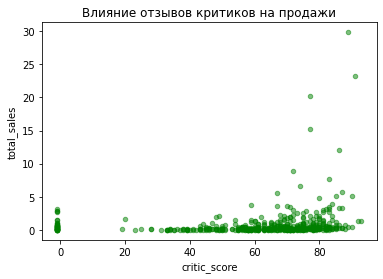

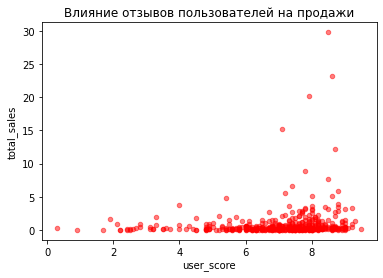

In [28]:
df_DS = df_act[(df_act['platform'] == 'DS') & (df_act['critic_score'] > 0)]
df_DS = df_act[(df_act['platform'] == 'DS') & (df_act['user_score'] > 0)]

df_DS.plot(x = 'critic_score',y = 'total_sales', kind='scatter', color='green',alpha=0.5, 
             title='Влияние отзывов критиков на продажи')
df_DS.plot(x = 'user_score',y = 'total_sales', kind='scatter', color='red',alpha=0.5, 
             title='Влияние отзывов пользователей на продажи')
plt.show()

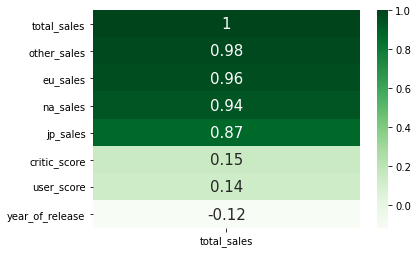

In [29]:
sns.heatmap(df_DS.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15})

**Зависимость продаж на топовых платформах от отзывов критиков и пользователей** 

Сведем все полученные данные в одну таблицу для налядности.

In [30]:
df_corr = pd.DataFrame ({
'Параметры': ['critic_score', 'user_score'],
'X360': [0.39, 0.11],
'PS2': [0.26, 0.19],
'PS3': [0.30, 0.13],
'Wii': [0.14, 0.11],
'DS': [0.15, 0.14],
})
df_corr

,Параметры,X360,PS2,PS3,Wii,DS
0,critic_score,0.39,0.26,0.30,0.14,0.15
1,user_score,0.11,0.19,0.13,0.11,0.14


Наибольшее влияние отзывы критиков оказывают на продажи игр для платформ 'X360', 'PS2', и 'PS3'. 
Зависимость от отзывов пользователей характеризуется большим количеством выбросов, поэтому и коэффициент Пирсона довольно низкий. Исходя из полученных данных мы не можем утверждать, что если отзывы пользователей и/или критиков будут исключительно положительными, то и продажи будут выше всех.

<a id='2.7'></a>
### 2.7 Общее распределение игр по жанрам

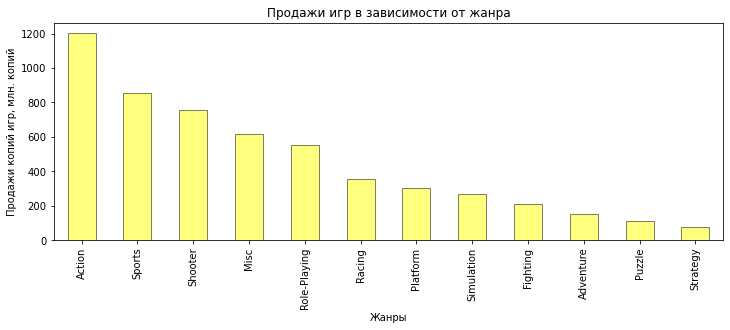

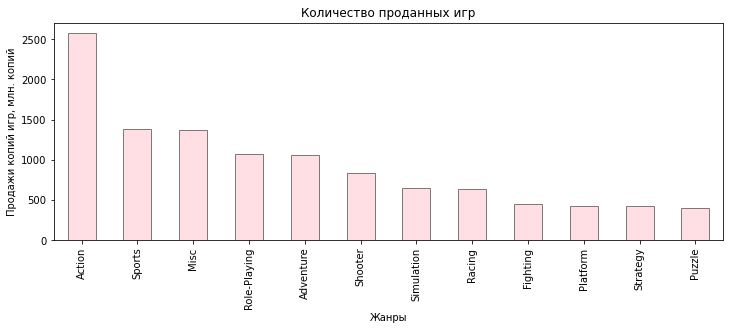

In [31]:
df_act.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,4), ec='black', 
                                                   color='yellow', alpha=0.5, title = 'Продажи игр в зависимости от жанра')
plt.xlabel('Жанры')
plt.ylabel('Продажи копий игр, млн. копий')
plt.show()

df_act.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,4), ec='black', 
                                                   color='pink', alpha=0.5, title = 'Количество проданных игр')
plt.xlabel('Жанры')
plt.ylabel('Продажи копий игр, млн. копий')
plt.show()

Самые высокие продажи по сумме и по количеству - это игры жанра Action, на втором месте игры жанры Sports, а третье место по сумме и по количеству проданных игр расходится. Больше денег приносит жанр Shooter, а покупают чаще игры жанра Misk, видимо, игры жанр Shooter стоят дороже.

<a id='3'></a>
# Шаг 3. Портрет пользователя каждого региона (NA, EU, JP)

<a id='3.1'></a>
### 3.1 Самые популярные платформы (топ-5) для пользователя каждого региона. Описание различия в долях продаж.

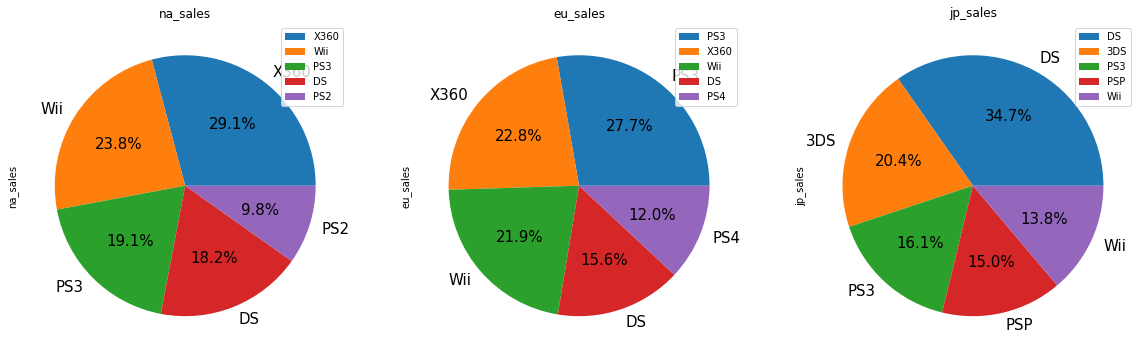

In [32]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = df_act.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    pivot.plot(kind='pie', subplots=True, fontsize=15, autopct='%.1f%%', figsize=(20,5), ax=axes[ax], title=[region_sales])      

fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

**Самые популярные платформы в Америке:**
* 1 место - Х360
* 2 место - Wii
* 2 место - PS3

**Самые популярные платформы в Европе:**
* 1 место - PS3
* 2 место - Х360
* 2 место - Wii

**Самые популярные платформы в Японии:**
* 1 место - DS
* 2 место - 3DS
* 2 место - PS3

В Америке и Европе предпочтения в платформах схожи, а вот в Японии лидирует DS.

<a id='3.2'></a>
### 3.2 Самые популярные жанры (топ-5)

In [33]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_info,31.38


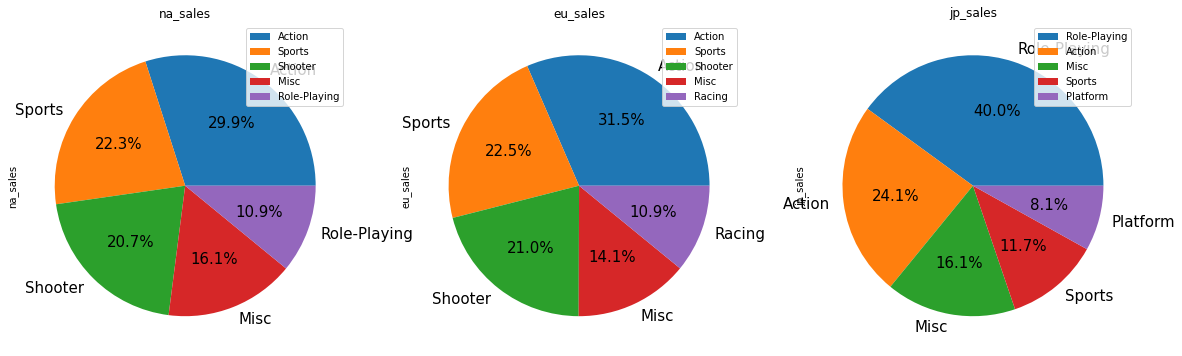

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

**Самые популярные жанры в Америке:**
* 1 место - Action
* 2 место - Sports
* 2 место - Shooter

**Самые популярные жанры в Европе:**
* 1 место - Action
* 2 место - Sports
* 2 место - Shooter

**Самые популярные жанры в Японии:**
* 1 место - Role-Playing
* 2 место - Action
* 2 место - Misc

В Америке и Европе не только платформы схожи, но и любимые жанры у пользователей, в Японии в топ-3 попал только Action.



<a id='3.3'></a>
### 3.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

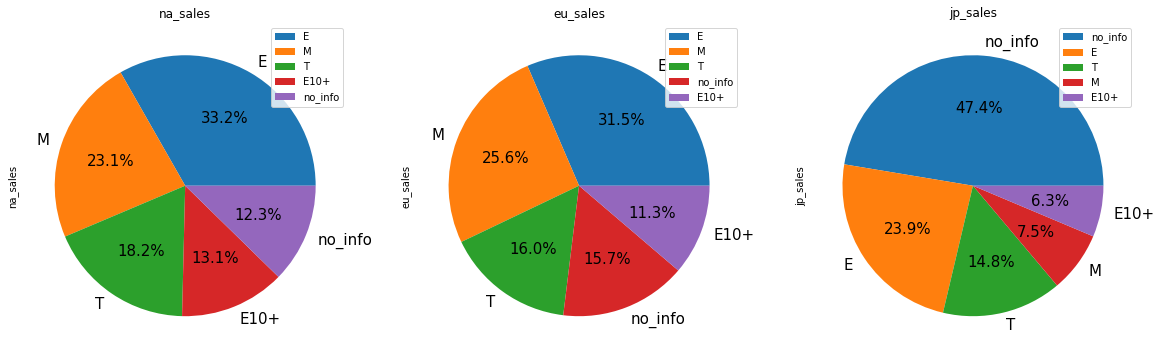

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

***Расшифровка буквенных обозначений:***
* E, K-A - для всех, 
* M - больше 17 лет, 
* T - 13-19 лет, 
* E10+ больше 10 лет.

В Америке и Европе больше всего покупают игры без возрастных ограничений, в Японии практически половина данных без указаний рейтинга, но лидируют также игры без ограничений по возрасту.

<a id='4'></a>
# Шаг 4. Проверка гипотез

<a id='4.1'></a>
### 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Гипотеза H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются.


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind(), параметр альфа определим как 0,05.

In [36]:
df_XOne = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
df_PC = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

In [37]:
print(len(df_XOne))
print(len(df_PC))

182
755


In [38]:
from scipy import stats as st

results = st.ttest_ind(df_XOne, df_PC, equal_var = False)
print('p-значение: ', results.pvalue)
print('пороговое значение alpha = 0.05')

p-значение:  4.5385802963771776e-06
пороговое значение alpha = 0.05


Отвергаем нулевую гипотезу, принимаем альтернативную, что средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга.

<a id='4.2'></a>
### 4.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* Гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
* Гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports отличаются.


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind(), параметр альфа определим как 0,05.

In [39]:
df_Action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
df_Sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

In [40]:
print(len(df_Action))
print(len(df_Sports))

1796
1081


In [41]:
from scipy import stats as st

results = st.ttest_ind(df_Action, df_Sports, equal_var = False)
print('p-значение: ', results.pvalue)
print('пороговое значение alpha = 0.05')

p-значение:  0.07370217419278534
пороговое значение alpha = 0.05


Принимаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые

<a id='5'></a>
# Шаг 5. Общий вывод

**Задача проекта - выяление определяющих успешность игры закономерностей.**

На **первом этапе** мы изучили все входные предоставленные исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.
* проверили данные на пропуски и избавились от них:
   - в столбце 'name' -  обнаружили 0.01% пропусков, заменили на 'no_info';
   - в столбце 'year_of_release' - обнаружили 1.61% пропусков, заполнили значением маркером 99;
   - в столбце 'genre' - обнаружили 0.01% пропусков, заменили на 'no_info';
   - в столбце 'rating' - обнаружили 40.48% пропусков, заменили на 'no_info';
   - в столбце 'user_score' - обнаружили 40,09% пропусков, заполнили значением маркером -1;
   - в столбце 'critic_score' - обнаружили 51,32% пропусков, заполнили значением маркером -1;
* изменили тип данных в столбце 'user_score' на float, предварительно заменив тектовое значение 'tbd' на np.NaN 
* проверили на наличие дубликатов -не обнаружили;
* добавили новый столбце с данными по продажам игр во всех регионах.

На **втором этапе** мы провели исследовательский анализ данных:
* Рассмотрели данные в разрезе по:
    - количеству выпускаемых игр по годам - до 1994 года игры практически не выпукались, лучшие продажи в 2008-2009 гг.;
    - изменению в продажах по платформам - самые популярные платформы для игр с 1994 года - PS2, X360, PS3, Wii, DS, PS;
    - сроку, за который появляются новые и исчезают старые платформы - в среднем 10 лет.
* Выбрали актуальный период для дальнейшей работы с данными - 2005-2016 гг.
* Рассмотрели продажи по топовым платформам за актуальный период - самая высокая верхняя граница ящика с усами у 'X360' - 1,75 млн. копий игр, самая низкая у  'DS'.
* Оценили влияние отзывов критиков и пользователей на продажи игр для топовых платформ 'PS2', 'X360', 'PS3', 'Wii', 'DS' -  зависимость от отзывов пользователей характеризуется большим количеством выбросов, зависимость от отзывов критиков имеет более закономерную прямую связь, но в целом ни те, ни другие не оказывают существуенного влияния на продажи.
* Оценили зависимость продаж по жанрам - самые высокие продажи по сумме и по количеству - это игры жанра Action;

На **третьем этапе** мы рассмотрели портрет пользователя для Сев. Америки, Европы и Японии - в Сев. Америке и Европе в целом предпочтения пользователей схожи, самые популярные платформы - это  Х360, Wii и PS3; самые популярны жанры - Action, Sports, Shooter. В Японии отличатся,  топ-платформ - DS, 3DS, PS3, жанры - Role-Playing, Action, Misc. Наиболее популярны игры без возрастных ограничений.

На **четвертом этапе** провели статистический анализ и проверили 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - приняли альтернативную гипотезу, что пользовательские рейтинги платформ Xbox One и PC различаются друг от друга;
* Средние пользовательские рейтинги жанров Action и Sports одинаковые - приняли нулевую гипотезу.

**Рекомендации**

Самые популярные игры на платформы - это 'PS2', 'X360', 'PS3', 'Wii', 'DS', стоит также принимать во внимание, новые платформы Xbox One и 'PS4', а самые популярные жанры Action, Sports, Shooter и Role-Playing. Если рассматривать год выпуска, отзывы пользователей и отзывы критиков, то последние оказывают наибольшее влияние на продажи игр.